In [13]:
!pip install torch
!pip install fastbook
# !pip install fsspec==2024.10.0
# !pip install datasets==3.2.0 gcsfs==2024.9.0

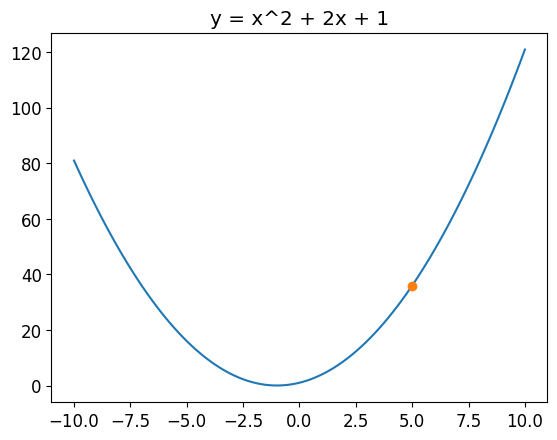

In [5]:
import torch

x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
# quadratic function
y = x**2 + 2*x + 1

# plot the function from x = 0 to x = 10
import matplotlib.pyplot as plt
import numpy as np
x_plt = np.linspace(-10, 10, 100)
y_plt = x_plt**2 + 2*x_plt + 1
plt.plot(x_plt, y_plt)
plt.title('y = x^2 + 2x + 1')

# Plot the x, y
plt.plot(x.detach().numpy(), y.detach().numpy(), 'o')
plt.show()

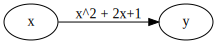

In [4]:
from fastbook import *

gv('''
   x -> y[label="x^2 + 2x+1"]
   ''')

In [10]:
x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
y = x**2 + 2*x + 1

# compute gradient
y.backward()

# print gradient
print(x.grad)

tensor(12.)


In [14]:
x = torch.tensor(5, requires_grad=False, dtype=torch.float32)
y = x**2 + 2*x + 1

# compute gradient
y.backward()

# Error
print(x.grad)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [12]:
# Randomly choose x
x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
alpha = 0.1

for i in range(10):
    y = x**2 + 2*x + 1
    y.backward()

    with torch.no_grad():
        x -= alpha * x.grad
        # gradient is accumulated, so we need to zero it
        x.grad.zero_()

    print(x.detach().numpy(), y.detach().numpy())


3.8 36.0
2.84 23.039999
2.072 14.7456
1.4576 9.437184
0.96607995 6.039798
0.57286394 3.8654704
0.25829116 2.473901
0.006632924 1.5832967
-0.19469367 1.0133098
-0.35575494 0.6485183


3.8 36.0 12.0
2.84 23.039999 9.600000381469727
2.072 14.7456 7.679999828338623
1.4576 9.437184 6.144000053405762
0.96607995 6.039798 4.915200233459473
0.57286394 3.8654704 3.932159900665283
0.25829116 2.473901 3.1457278728485107
0.006632924 1.5832967 2.5165822505950928
-0.19469367 1.0133098 2.01326584815979
-0.35575494 0.6485183 1.6106126308441162
-0.48460394 0.4150517 1.2884900569915771
-0.58768314 0.2656331 1.0307921171188354
-0.6701465 0.1700052 0.8246337175369263
-0.73611724 0.10880327 0.6597069501876831
-0.7888938 0.06963408 0.5277655124664307
-0.83111507 0.044565797 0.4222123622894287
-0.86489207 0.028522134 0.33776986598968506
-0.89191365 0.01825416 0.27021586894989014
-0.91353095 0.01168263 0.2161726951599121
-0.93082476 0.007476926 0.17293810844421387
-0.9446598 0.0047852397 0.1383504867553711
-0.9557279 0.0030625463 0.11068034172058105
-0.9645823 0.0019600391 0.08854424953460693
-0.97166586 0.0012544394 0.07083535194396973
-0.9773327 0.00080281496 0.05666828155517578
-0.98186

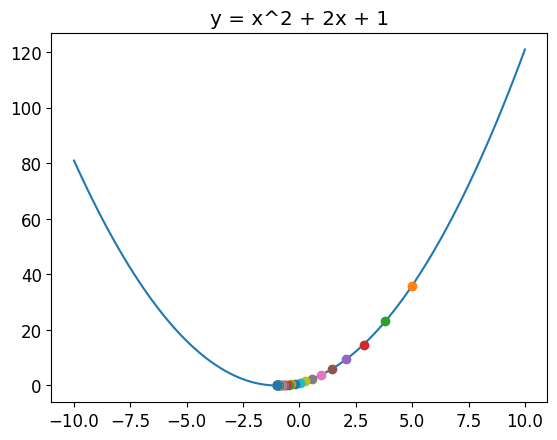

In [15]:
# Randomly choose x
x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
alpha = 0.1

x_plt = np.linspace(-10, 10, 100)
y_plt = x_plt**2 + 2*x_plt + 1
plt.plot(x_plt, y_plt)
plt.title('y = x^2 + 2x + 1')

# Plot the
for i in range(50):
    y = x**2 + 2*x + 1
    plt.plot(x.detach().numpy(), y.detach().numpy(), 'o')

    y.backward()

    gradient = None
    with torch.no_grad():
        gradient = x.grad.item()
        x -= alpha * x.grad
        # gradient is accumulated, so we need to zero it
        x.grad.zero_()

    print(x.detach().numpy(), y.detach().numpy(), gradient)

plt.show()

In [16]:
# Randomly choose x
x = torch.tensor(5, requires_grad=True, dtype=torch.float32)
alpha = 0.1
optimizer = torch.optim.SGD([x], lr=alpha)

for i in range(10):
    y = x**2 + 2*x + 1
    y.backward()

    optimizer.step()
    optimizer.zero_grad()

    print(x.detach().numpy(), y.detach().numpy())


3.8 36.0
2.84 23.039999
2.072 14.7456
1.4576 9.437184
0.96607995 6.039798
0.57286394 3.8654704
0.25829116 2.473901
0.0066329264 1.5832967
-0.19469365 1.0133098
-0.3557549 0.6485183


In [17]:
x = torch.tensor([[0], [1]], dtype=torch.float32)
y = torch.tensor([1, 0], dtype=torch.float32)

w = torch.tensor([[3]], requires_grad=True, dtype=torch.float32)
b = torch.tensor([[1]], requires_grad=True, dtype=torch.float32)

a = torch.sigmoid(w@x.T + b)

print("a = ", a)

loss = torch.square(a - y)
print("loss = ", loss.detach().numpy())

loss = torch.mean(loss)
print("sum loss = ", loss.detach().numpy())

loss.backward()

print("w_grad = ", w.grad)
print("b_grad = ", b.grad)

a =  tensor([[0.7311, 0.9820]], grad_fn=<SigmoidBackward0>)
loss =  [[0.07232948 0.96435106]]
sum loss =  0.5183403
w_grad =  tensor([[0.0173]])
b_grad =  tensor([[-0.0355]])


In [18]:
import torch

x = torch.tensor([[0], [1]], dtype=torch.float32)
y = torch.tensor([1, 0], dtype=torch.float32)

w = torch.tensor([[3]], requires_grad=True, dtype=torch.float32)
b = torch.tensor([[1]], requires_grad=True, dtype=torch.float32)

optimizer = torch.optim.SGD([w, b], lr=10)

for i in range(5):
    print("Iteration ", i)
    print("w = ", w.detach().numpy())
    print("b = ", b.detach().numpy())

    a = torch.sigmoid(w@x.T + b)

    print("a = ", a)

    loss = torch.square(a - y)
    print("loss = ", loss.detach().numpy())

    loss = torch.mean(loss)
    print("mean loss = ", loss.detach().numpy())

    loss.backward()

    print("w_grad = ", w.grad)
    print("b_grad = ", b.grad)

    # Update w, b
    optimizer.step()
    optimizer.zero_grad()

    print()

Iteration  0
w =  [[3.]]
b =  [[1.]]
a =  tensor([[0.7311, 0.9820]], grad_fn=<SigmoidBackward0>)
loss =  [[0.07232948 0.96435106]]
mean loss =  0.5183403
w_grad =  tensor([[0.0173]])
b_grad =  tensor([[-0.0355]])

Iteration  1
w =  [[2.8265495]]
b =  [[1.3553203]]
a =  tensor([[0.7950, 0.9850]], grad_fn=<SigmoidBackward0>)
loss =  [[0.0420258  0.97014576]]
mean loss =  0.50608575
w_grad =  tensor([[0.0146]])
b_grad =  tensor([[-0.0188]])

Iteration  2
w =  [[2.6806376]]
b =  [[1.5435126]]
a =  tensor([[0.8240, 0.9856]], grad_fn=<SigmoidBackward0>)
loss =  [[0.03098487 0.97135484]]
mean loss =  0.50116986
w_grad =  tensor([[0.0140]])
b_grad =  tensor([[-0.0115]])

Iteration  3
w =  [[2.5405037]]
b =  [[1.6586862]]
a =  tensor([[0.8401, 0.9852]], grad_fn=<SigmoidBackward0>)
loss =  [[0.02558029 0.970647  ]]
mean loss =  0.49811363
w_grad =  tensor([[0.0144]])
b_grad =  tensor([[-0.0071]])

Iteration  4
w =  [[2.3969855]]
b =  [[1.7300582]]
a =  tensor([[0.8494, 0.9841]], grad_fn=<Sigmoid

In [20]:
import torch

x = torch.tensor([[0], [1]], dtype=torch.float32)
y = torch.tensor([1, 0], dtype=torch.float32)

class NotGate(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.tensor([[3.]]))
        self.b = torch.nn.Parameter(torch.tensor([[1.]]))

    def forward(self, x):
        return torch.sigmoid(self.w@x.T + self.b)

model = NotGate()
optimizer = torch.optim.SGD(model.parameters(), lr=10)

for i in range(5):
    print("Iteration ", i)
    print("w = ", model.w.detach().numpy())
    print("b = ", model.b.detach().numpy())

    model.train()
    a = model(x)

    print("a = ", a)

    loss = torch.square(a - y)
    print("loss = ", loss.detach().numpy())

    loss = torch.mean(loss)
    print("mean loss = ", loss.detach().numpy())

    loss.backward()

    print("w_grad = ", model.w.grad)
    print("b_grad = ", model.b.grad)

    # Update w, b
    optimizer.step()
    optimizer.zero_grad()

    print()

Iteration  0
w =  [[3.]]
b =  [[1.]]
a =  tensor([[0.7311, 0.9820]], grad_fn=<SigmoidBackward0>)
loss =  [[0.07232948 0.96435106]]
mean loss =  0.5183403
w_grad =  tensor([[0.0173]])
b_grad =  tensor([[-0.0355]])

Iteration  1
w =  [[2.8265495]]
b =  [[1.3553203]]
a =  tensor([[0.7950, 0.9850]], grad_fn=<SigmoidBackward0>)
loss =  [[0.0420258  0.97014576]]
mean loss =  0.50608575
w_grad =  tensor([[0.0146]])
b_grad =  tensor([[-0.0188]])

Iteration  2
w =  [[2.6806376]]
b =  [[1.5435126]]
a =  tensor([[0.8240, 0.9856]], grad_fn=<SigmoidBackward0>)
loss =  [[0.03098487 0.97135484]]
mean loss =  0.50116986
w_grad =  tensor([[0.0140]])
b_grad =  tensor([[-0.0115]])

Iteration  3
w =  [[2.5405037]]
b =  [[1.6586862]]
a =  tensor([[0.8401, 0.9852]], grad_fn=<SigmoidBackward0>)
loss =  [[0.02558029 0.970647  ]]
mean loss =  0.49811363
w_grad =  tensor([[0.0144]])
b_grad =  tensor([[-0.0071]])

Iteration  4
w =  [[2.3969855]]
b =  [[1.7300582]]
a =  tensor([[0.8494, 0.9841]], grad_fn=<Sigmoid

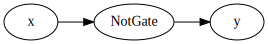

In [21]:
from fastbook import *

gv('''
x -> NotGate -> y
''')

In [22]:
import torch

x = torch.tensor([[0], [1]], dtype=torch.float32)
y = torch.tensor([1, 0], dtype=torch.float32)

class NotGate(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

model = NotGate()
optimizer = torch.optim.SGD(model.parameters(), lr=10)

for i in range(5):
    print("Iteration ", i)
    print("w = ", model.linear.weight.detach().numpy())
    print("b = ", model.linear.bias.detach().numpy())

    model.train()
    a = model(x)

    print("a = ", a)

    loss = torch.square(a - y)
    print("loss = ", loss.detach().numpy())

    loss = torch.mean(loss)
    print("mean loss = ", loss.detach().numpy())

    loss.backward()

    print("w_grad = ", model.linear.weight.grad)
    print("b_grad = ", model.linear.bias.grad)

    # Update w, b
    optimizer.step()
    optimizer.zero_grad()

    print()

Iteration  0
w =  [[0.7645385]]
b =  [0.8300079]
a =  tensor([[0.6964],
        [0.8313]], grad_fn=<SigmoidBackward0>)
loss =  [[0.09219932 0.4849125 ]
 [0.02847493 0.6909846 ]]
mean loss =  0.32414284
w_grad =  tensor([[0.0465]])
b_grad =  tensor([0.0880])

Iteration  1
w =  [[0.2998866]]
b =  [-0.04982847]
a =  tensor([[0.4875],
        [0.5622]], grad_fn=<SigmoidBackward0>)
loss =  [[0.26260963 0.23770061]
 [0.19167687 0.31605852]]
mean loss =  0.25201142
w_grad =  tensor([[0.0153]])
b_grad =  tensor([0.0122])

Iteration  2
w =  [[0.1468149]]
b =  [-0.17178324]
a =  tensor([[0.4572],
        [0.4938]], grad_fn=<SigmoidBackward0>)
loss =  [[0.2946758  0.2089948 ]
 [0.2562807  0.24379723]]
mean loss =  0.2509371
w_grad =  tensor([[-0.0016]])
b_grad =  tensor([-0.0122])

Iteration  3
w =  [[0.16241682]]
b =  [-0.04986634]
a =  tensor([[0.4875],
        [0.5281]], grad_fn=<SigmoidBackward0>)
loss =  [[0.2626194  0.23769131]
 [0.22268212 0.278898  ]]
mean loss =  0.25047272
w_grad =  ten

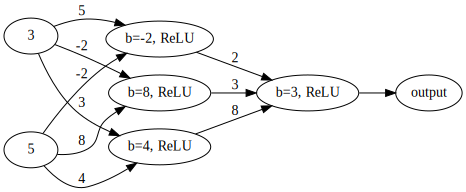

In [23]:
from fastbook import *

gv('''
   x_0[label=3]
   x_1[label=5]
   a_0_0[label="b=8, ReLU"]
   a_0_1[label="b=-2, ReLU"]
   a_0_2[label="b=4, ReLU"]
   a_1_0[label="b=3, ReLU"]
   x_0 -> a_0_0 [label=-2]
   x_0 -> a_0_1 [label=5]
   x_0 -> a_0_2 [label=3]
   x_1 -> a_0_0 [label=8]
   x_1 -> a_0_1 [label=-2]
   x_1 -> a_0_2 [label=4]
   a_0_0 -> a_1_0 [label=3]
   a_0_1 -> a_1_0 [label=2]
   a_0_2 -> a_1_0 [label=8]

   a_1_0 -> output
   ''')

In [24]:
class ComplexNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(in_features=2, out_features=3)
        self.linear2 = torch.nn.Linear(in_features=3, out_features=1)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        return x

model = ComplexNetwork()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

x = torch.tensor([[3, 5]], dtype=torch.float32)
y = torch.tensor([[10]], dtype=torch.float32)

for i in range(5):
    model.train()
    y_hat = model(x)

    loss = torch.square(y_hat - y)
    loss = torch.mean(loss)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    print("Iteration ", i)
    print("w1 = ", model.linear1.weight.detach().numpy())
    print("b1 = ", model.linear1.bias.detach().numpy())
    print("w2 = ", model.linear2.weight.detach().numpy())
    print("b2 = ", model.linear2.bias.detach().numpy())

    print("loss = ", loss.detach().numpy())


Iteration  0
w1 =  [[ 0.4325895   1.6466315 ]
 [-0.15492962  0.14268756]
 [ 0.08863842  1.1367664 ]]
b1 =  [ 0.82276    -0.5187534   0.75891346]
w2 =  [[6.3349686 0.4265515 3.1383448]]
b2 =  [2.123862]
loss =  85.14404
Iteration  1
w1 =  [[-2.9896396e+02 -4.9734763e+02]
 [-1.5492962e-01  1.4268756e-01]
 [-1.4823248e+02 -2.4606509e+02]]
b1 =  [-98.97609    -0.5187534 -48.681458 ]
w2 =  [[-156.77332      0.4265515 -102.54752  ]]
b2 =  [-13.629784]
loss =  6204.4336
Iteration  2
w1 =  [[-2.9896396e+02 -4.9734763e+02]
 [-1.5492962e-01  1.4268756e-01]
 [-1.4823248e+02 -2.4606509e+02]]
b1 =  [-98.97609    -0.5187534 -48.681458 ]
w2 =  [[-156.77332      0.4265515 -102.54752  ]]
b2 =  [-13.629784]
loss =  100.0
Iteration  3
w1 =  [[-2.9896396e+02 -4.9734763e+02]
 [-1.5492962e-01  1.4268756e-01]
 [-1.4823248e+02 -2.4606509e+02]]
b1 =  [-98.97609    -0.5187534 -48.681458 ]
w2 =  [[-156.77332      0.4265515 -102.54752  ]]
b2 =  [-13.629784]
loss =  100.0
Iteration  4
w1 =  [[-2.9896396e+02 -4.973